# Introduction

In [1]:
#Importing System performance libraries
import warnings
warnings.filterwarnings("ignore") 

import os 
import psutil 
process = psutil.Process(os.getpid())

from psutil import virtual_memory
mem = virtual_memory()

import time 

In [2]:
#Importing python, ML libraries
from gensim.models import Word2Vec, KeyedVectors #To load the model
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
!wget -P /tmp/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"


--2020-07-06 14:35:22--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.83.27
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.83.27|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 1647046227 (1.5G), 1072794242 (1023M) remaining [application/x-gzip]
Saving to: ‘/tmp/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[++++++=============>]   1.53G  68.2MB/s    in 16s     

2020-07-06 14:35:38 (63.8 MB/s) - ‘/tmp/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [4]:
pretrainedpath = '/tmp/input/GoogleNews-vectors-negative300.bin.gz'

# Visualizations

In [5]:
#Load Model with the given embeddings in the binary file
model = KeyedVectors.load_word2vec_format(pretrainedpath, binary=True)

#Preprocessing model vocab
words_vocab= list(model.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])






Size of Vocabulary: 3000000
Few words in Vocabulary ['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out']


In [28]:
#Removing all words containing alphanumeric characters
final_vocab = [word.lower() for word in words_vocab if word.isalnum()]
print("Size of Vocabulary without alphanumeirc words:",len(final_vocab))
print("Few words in Vocabulary",final_vocab[:20])

Size of Vocabulary without alphanumeirc words: 878327
Few words in Vocabulary ['in', 'for', 'that', 'is', 'on', 'the', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'i', 'have']


In [31]:
#Focusing analysis on 10 words in vocab
import random
#random_words = ['rich', 'accomplishments', 'repairs', 'guide', 'health', 'flying', 'surveys', 'valuable', 'lock', 'rounded']
random_words = [final_vocab[i] for i in random.sample(range(10000),10)]
print(random_words)

['chains', 'habits', 'thereby', 'shocking', 'respectively', 'dead', 'sure', 'thrilled', 'correspondent', 'conducting']


In [32]:
#Finding word and embedding clusters of given words

similar_word_list = {word:model.most_similar(word, topn=10) for word in random_words}

word_clusters = [[sim_word[0]  for sim_word in similar_word_list[word]] for word in similar_word_list]

emb_clusters = [[list(model[word]) for word in group] for group in word_clusters ]


In [33]:
from sklearn.manifold import TSNE
import numpy as np

emb_clusters = np.array(emb_clusters)
n, m, k = emb_clusters.shape 
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(emb_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it



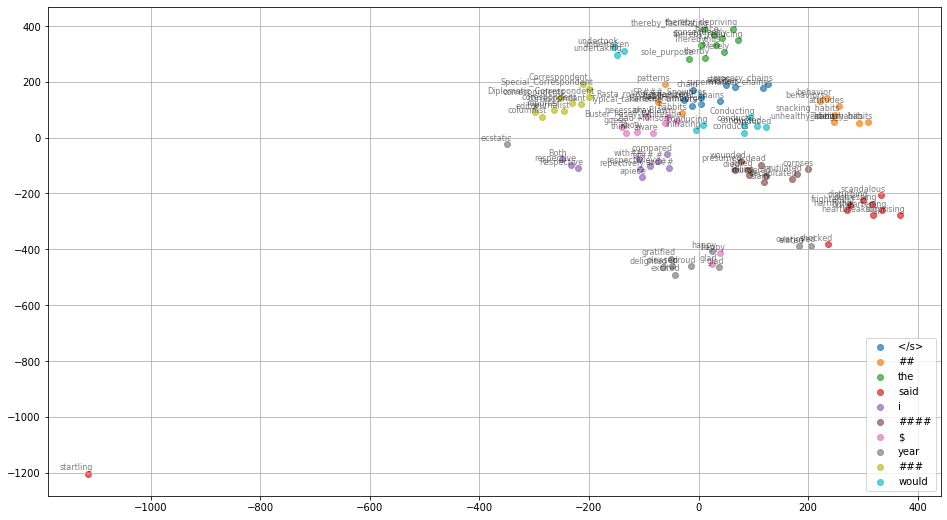

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
% matplotlib inline

#Plotting
def tsne_plot_similar_words(labels, emb_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, emb_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)